In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')

In [6]:
df.head(9)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3


In [7]:
df["custcat"].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

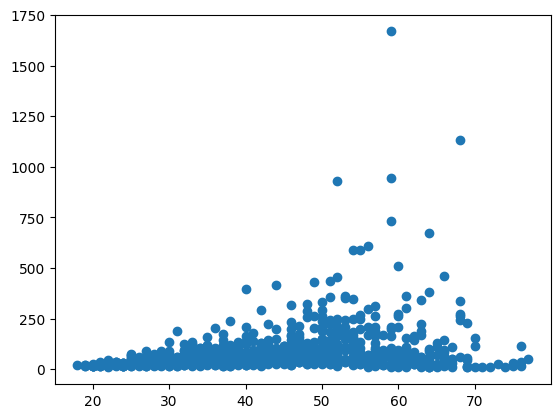

In [8]:
plt.scatter(df["age"], df["income"])

<Axes: xlabel='age', ylabel='income'>

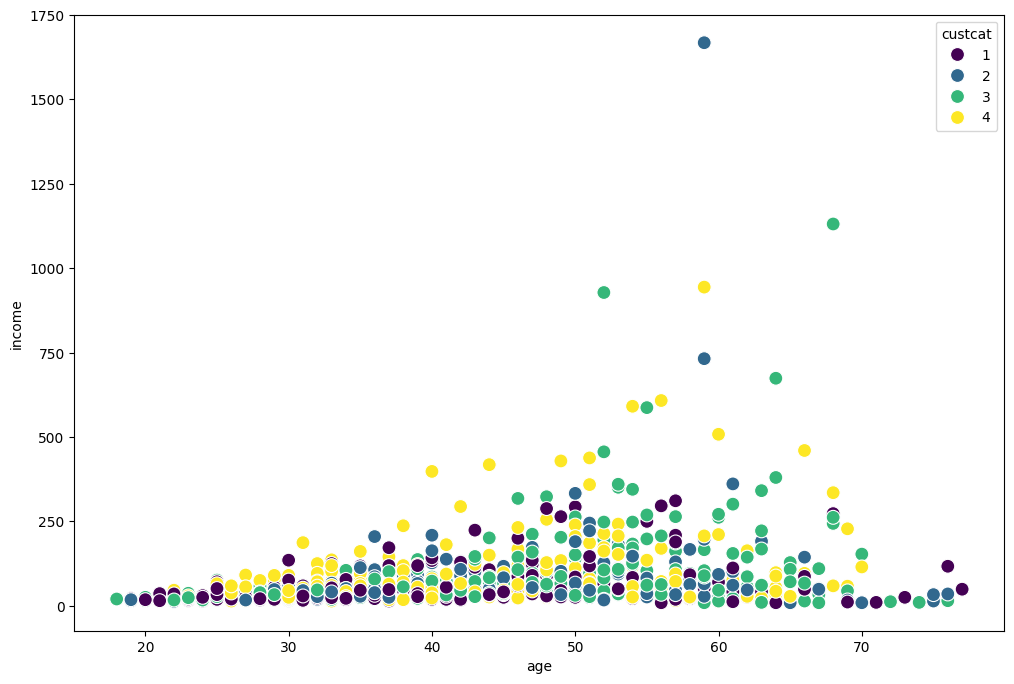

In [10]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='income', hue='custcat', data=df, palette='viridis', s=100)

Euclidean distance

In [11]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [12]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']].values

In [13]:
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [14]:
y = df['custcat'].values

In [15]:
y[0:5]

array([1, 4, 3, 1, 3])

In [17]:
from sklearn import preprocessing

In [18]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [19]:
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [23]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
k = 4
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

In [27]:
y_hat = neigh.predict(X_test)

In [29]:
y_hat[0:5]

array([4, 1, 3, 2, 1])

In [30]:
from sklearn import metrics

# evaluation
print("Test set accuracy:", metrics.accuracy_score(y_test, y_hat))

Test set accuracy: 0.285


In [36]:
Ks = 10

mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

In [37]:
for n in range(1, Ks):
    # train and prediction for each k
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    y_hat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat)
    std_acc[n-1] = np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])

In [38]:
mean_acc

array([0.275, 0.285, 0.265, 0.285, 0.305, 0.325, 0.335, 0.315, 0.335])

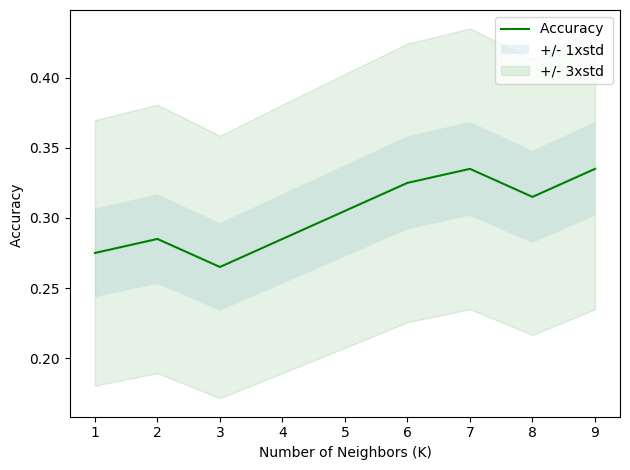

In [39]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [40]:
print( "The best accuracy", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy 0.335 with k= 7


## Evaluation Metrics

- Jaccard Index
- F1-score
- Log loss

In [41]:
y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_hat = [1, 1, 0, 0, 0, 1, 1, 1, 1, 1]

In [42]:
jaccard = 8 / (10 + 10 - 8)
print(jaccard)

0.6666666666666666


High accuracy: 1.0, Low accuracy: 0.0

## F1-score

Precision is a measure of the accuracy
Recall is the true positive rate

Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

F1-score = 2 * (prc * rec) / (prc + rec)

In [43]:
TP = 10
FN = 2
TN = 12
FP = 1

# class = 1
precision_1 = TP / (TP + FP)
recall_1 = TP / (TP + FN)

In [44]:
TP = 12
FN = 1
TN = 10
FP = 2

# class = 0
precision_0 = TP / (TP + FP)
recall_0 = TP / (TP + FN)

In [45]:
f1_score_0 = 2 * (precision_0 * recall_0) / (precision_0 + recall_0)
f1_score_1 = 2 * (precision_1 * recall_1) / (precision_1 + recall_1)

In [46]:
print(f"{f1_score_0:.2f}")
print(f"{f1_score_1:.2f}")

0.89
0.87


The F1 score's best value is 1.0

- Log loss
if output of classifier is the probability of a class label instead of the label, we can use log loss.

## Decision Trees

In [47]:
my_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")

In [48]:
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


Classes are:
Drug <A>
Drug <B>

Decision Tree:
- age
    - young
        - sex
            - F <A>
            - M <B>
    - middle-age <B>

    - senior
        - cholesterol
            - high <A>
            - normal <B>

Decision trees are built using recursive partitioning to classify the data.

- More predictiveness
- Less Impurity
- Lower Entropy
- Higher Information Gain


"Pure Node": A node in the tree is considered pure if, in all of the cases, the nodes fall into a spesific category. 

"The tree with the higher information gain after splitting."
Information gain = Entropy before split - Weighted entropy after split

In [49]:
my_data.shape

(200, 6)

In [50]:
my_data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [51]:
my_data['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [52]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

In [53]:
from sklearn import preprocessing

In [54]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 

In [55]:
le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

In [56]:
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [57]:
y = my_data["Drug"]

In [58]:
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=43)

In [60]:
from sklearn.tree import DecisionTreeClassifier

drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)


In [61]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [62]:
predTree = drugTree.predict(X_testset)

In [63]:
print (predTree [0:5])
print (y_testset [0:5])

['drugB' 'drugX' 'drugX' 'drugX' 'drugB']
56    drugB
37    drugX
67    drugX
79    drugX
80    drugB
Name: Drug, dtype: object


In [64]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


In [65]:
print(metrics.jaccard_score(y_testset, predTree, average='weighted'))

0.9700000000000001


In [66]:
print(metrics.f1_score(y_testset, predTree, average='weighted'))

0.9833333333333333


In [68]:
import matplotlib.pyplot as plt
from sklearn import tree

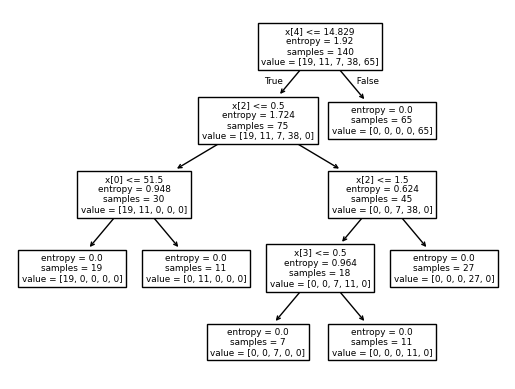

In [69]:
tree.plot_tree(drugTree)
plt.show()

In [70]:
text_representation = tree.export_text(drugTree)
print(text_representation)

|--- feature_4 <= 14.83
|   |--- feature_2 <= 0.50
|   |   |--- feature_0 <= 51.50
|   |   |   |--- class: drugA
|   |   |--- feature_0 >  51.50
|   |   |   |--- class: drugB
|   |--- feature_2 >  0.50
|   |   |--- feature_2 <= 1.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: drugC
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: drugX
|   |   |--- feature_2 >  1.50
|   |   |   |--- class: drugX
|--- feature_4 >  14.83
|   |--- class: drugY



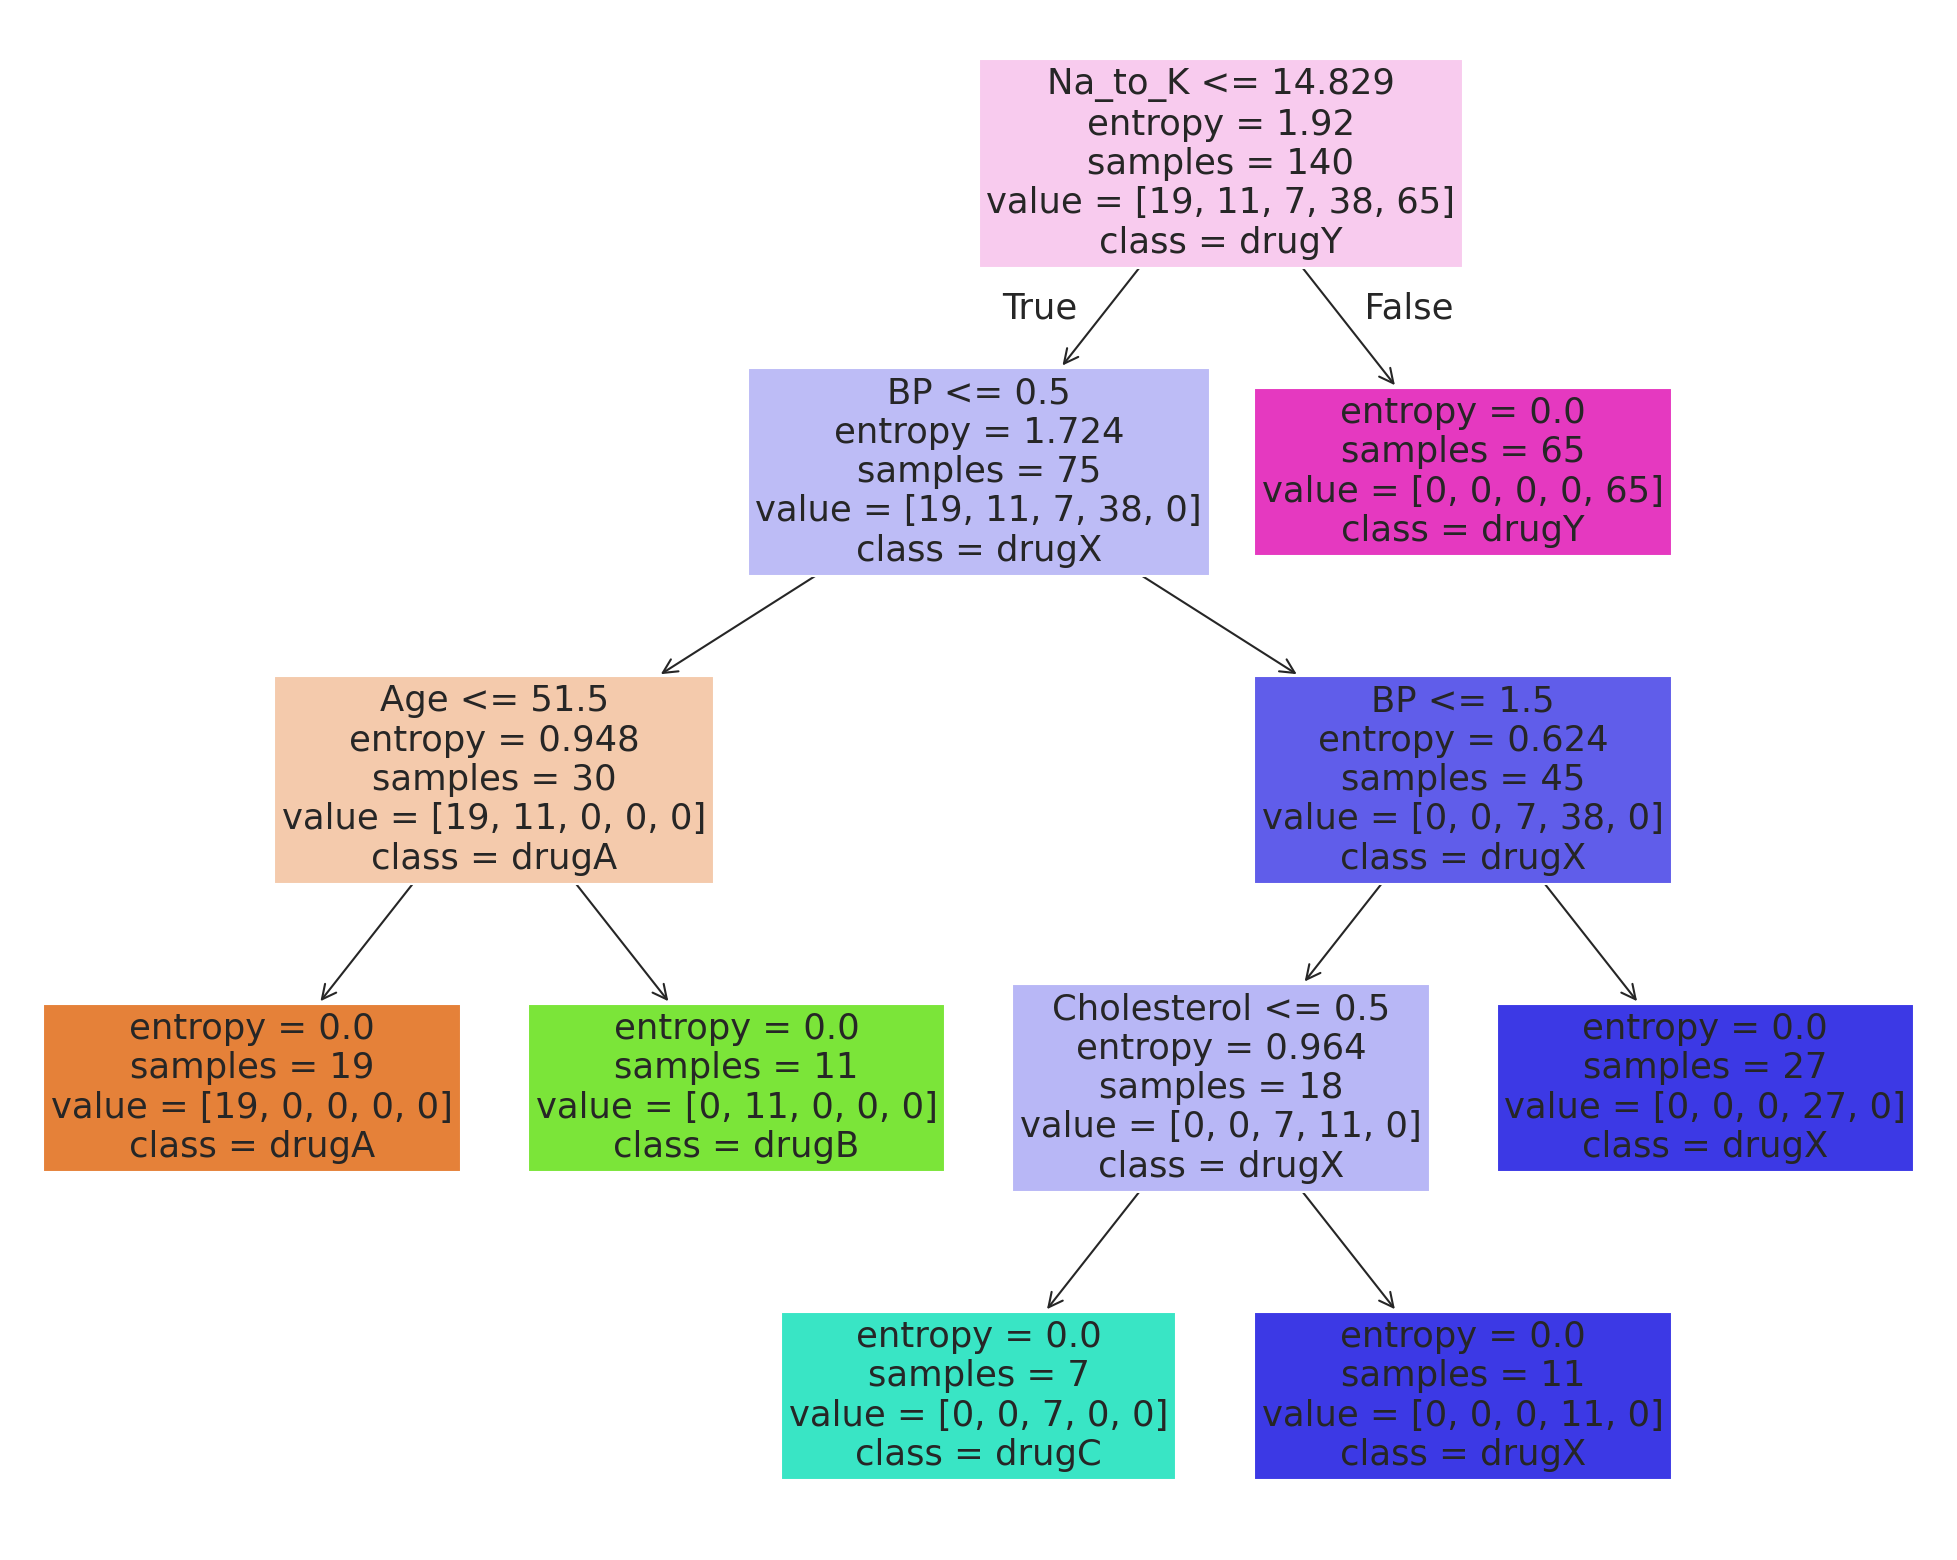

In [75]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(drugTree,
                   feature_names=my_data.columns.tolist()[:5],
                   class_names=drugTree.classes_.tolist(),
                   filled=True)